## SOT using L2 (a Bayesian framework)

This code retrieves a surface map from reflection integrated light curve of an Earth analog.

See 
- Kawahara & Fujii 2010 (http://adsabs.harvard.edu/cgi-bin/bib_query?arXiv:1004.5152)
- Kawahara & Fujii 2011 (http://adsabs.harvard.edu/cgi-bin/bib_query?arXiv:1106.0136)
- Fujii & Kawahara 2012 (http://adsabs.harvard.edu/cgi-bin/bib_query?arXiv:1204.3504)

for more details.  You need Healpy, Scikit-learn, sot package https://github.com/HajimeKawahara/sot.
Add sot/sot/core in your PYTHONPATH.

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import numpy as np
import healpy as hp
import pylab 
import matplotlib.pyplot as plt
import time
import mocklc #Use mocklc module in sot package. 

In [4]:
#set geometry
inc=0.0
Thetaeq=np.pi
zeta=np.pi/3.0
                                                                                                
Pspin=23.9344699/24.0 #Pspin: a sidereal day                                                                                                                                                                                                               
wspin=2*np.pi/Pspin                                                                                                          
#Porb=365.242190402                                            
Porb=40.0
worb=2*np.pi/Porb                                                                                                                
N=1024
obst=np.linspace(0.0,Porb,N)

NSIDE = 16
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


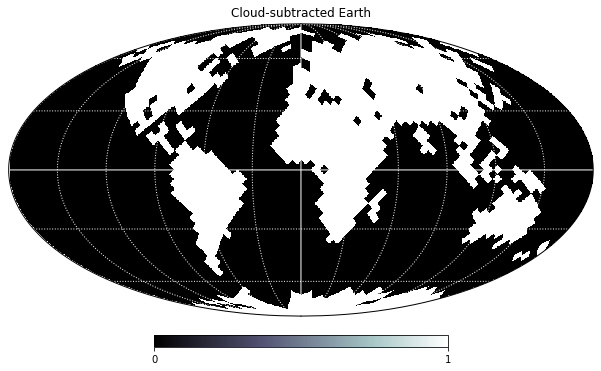

In [5]:
# test map
nside=16
mmap=hp.read_map("../data/mockalbedo16.fits")
mask=(mmap>0.0)
mmap[mask]=1.0
hp.mollview(mmap, title="Cloud-subtracted Earth",flip="geo",cmap=plt.cm.bone,min=0,max=1)
#hp.mollview(Kvolall,title="Kvol",flip="geo",cmap=plt.cm.Spectral,min=-0.3,max=0.3)
hp.graticule(color="white");
M=len(mmap)

In [6]:
#generating light curve
Thetav=worb*obst
Phiv=np.mod(wspin*obst,2*np.pi)
WI,WV=mocklc.comp_weight(nside,zeta,inc,Thetaeq,Thetav,Phiv)
W=WV[:,:]*WI[:,:]
lc=np.dot(W,mmap)

sigma=np.mean(lc)*0.03
noise=np.random.normal(0.0,sigma,len(lc))
lc=lc+noise

('npix=', 3072)
Shopes of eO, eS, eR
(3,) (3, 1024) (3, 1024, 3072)


No handles with labels found to put in legend.


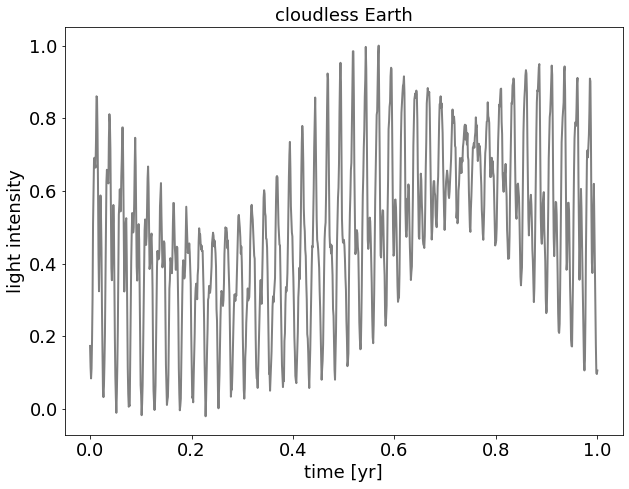

In [7]:
fig= plt.figure(figsize=(10,7.5))
ax = fig.add_subplot(111)
ax.plot(obst/obst[-1],lc/np.max(lc),lw=2,color="gray")
plt.legend(loc="upper right",prop={'size':11},frameon=False)
plt.tick_params(labelsize=18)
plt.ylabel("light intensity",fontsize=18)
plt.xlabel("time [yr]",fontsize=18)
plt.title("cloudless Earth",fontsize=18)
plt.savefig("sotlc.png", bbox_inches="tight", pad_inches=0.0)
plt.show()


## Ridge/L2 

In [139]:
#posterior
lam=2.0
npix=hp.nside2npix(nside)
A=np.linalg.inv(W.T@W + lam*lam*np.eye(npix))
mu=A@W.T@lc
cov=sigma**2*A

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


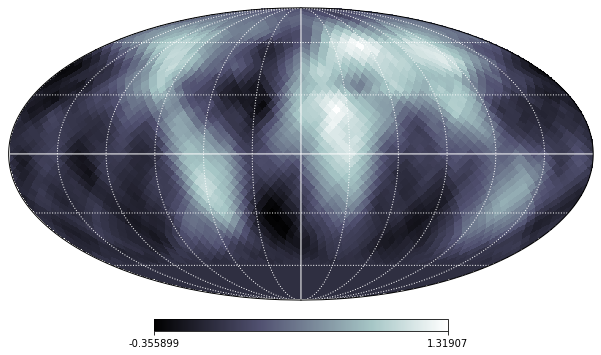

In [140]:
#best map
hp.mollview(mu, title="",flip="geo",cmap=plt.cm.bone)#,min=0,max=1.0)
hp.graticule(color="white");

In [141]:
# random realization
randmap=np.random.multivariate_normal(mu,cov,npix)

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


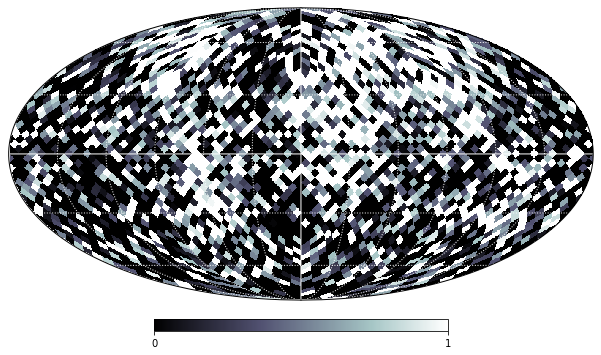

In [142]:
# pick a sample 
hp.mollview(randmap[50,:], title="",flip="geo",cmap=plt.cm.bone,min=0,max=1.0)
hp.graticule(color="white");

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


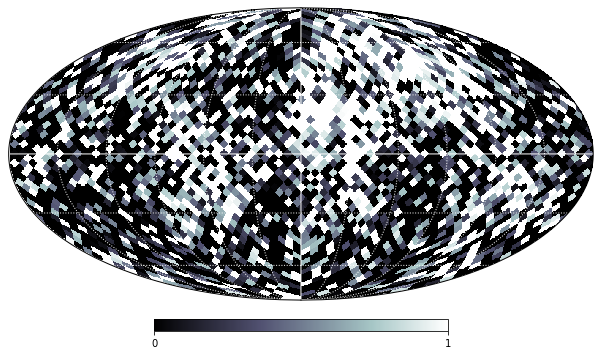

In [143]:
#randomized map
hp.mollview(np.diagonal(randmap), title="",flip="geo",cmap=plt.cm.bone,min=0,max=1.0)
hp.graticule(color="white");

## RBF kernel

In [97]:
import sepmat 
import gpkernel 

In [123]:
sep=sepmat.calc_sepmatrix(nside)

In [124]:
gamma=np.pi/6
S=gpkernel.RBF(sep,gamma)


In [126]:
#posterior
npix=hp.nside2npix(nside)
PiS=np.linalg.inv(S)
A=np.linalg.inv(W.T@W + PiS)
mu=A@W.T@lc
cov=sigma**2*A

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


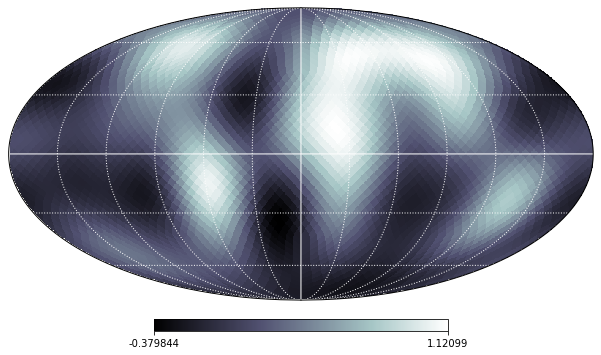

In [134]:
#best map
hp.mollview(mu, title="",flip="geo",cmap=plt.cm.bone)#,min=0,max=1.0)
hp.graticule(color="white");

In [128]:
randmap=np.random.multivariate_normal(mu,cov,npix)

/home/kawahara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  """Entry point for launching an IPython kernel.


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


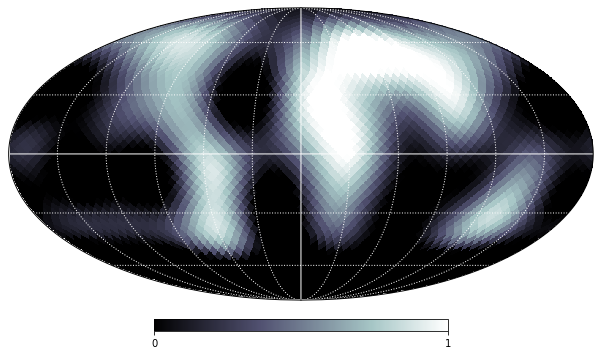

In [137]:
hp.mollview(randmap[50,:], title="",flip="geo",cmap=plt.cm.bone,min=0,max=1.0)
hp.graticule(color="white");

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


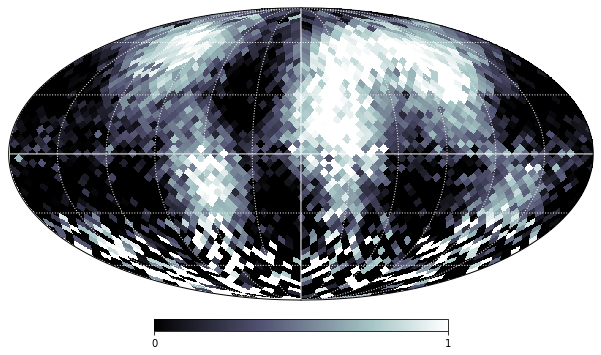

In [138]:
hp.mollview(np.diagonal(randmap), title="",flip="geo",cmap=plt.cm.bone,min=0,max=1.0)
hp.graticule(color="white");

## Matern -3/2

In [88]:
gamma=np.pi/3
S=gpkernel.Matern32(sep,gamma)

In [89]:
#posterior
lam=2.0
npix=hp.nside2npix(nside)
PiS=np.linalg.inv(S)
A=np.linalg.inv(W.T@W + PiS)
mu=A@W.T@lc
cov=sigma**2*A

In [90]:
randmap=np.random.multivariate_normal(mu,cov,npix)

/home/kawahara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  """Entry point for launching an IPython kernel.


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


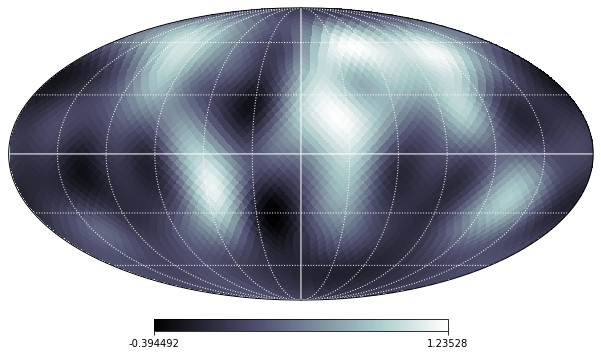

In [91]:
#best map
hp.mollview(mu, title="",flip="geo",cmap=plt.cm.bone)#,min=0,max=1.0)
hp.graticule(color="white");

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


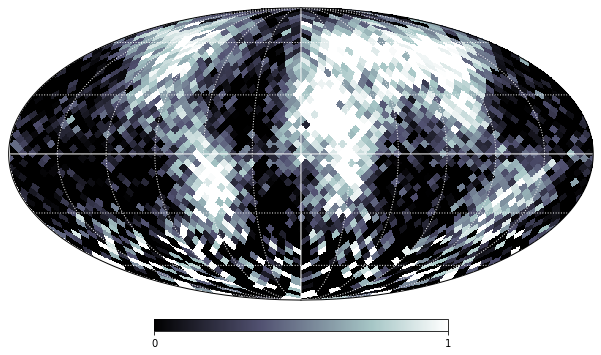

In [92]:
hp.mollview(np.diagonal(randmap), title="",flip="geo",cmap=plt.cm.bone,min=0,max=1.0)
hp.graticule(color="white");

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


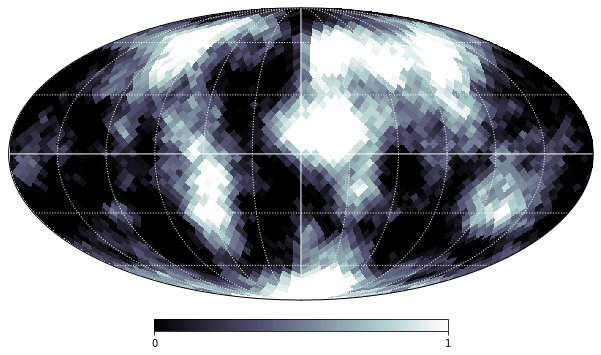

In [96]:
hp.mollview(randmap[52,:], title="",flip="geo",cmap=plt.cm.bone,min=0,max=1.0)
hp.graticule(color="white");